In [16]:
import pandas as pd
df=pd.read_excel(r"C:\Users\ril\OneDrive\Desktop\5 th sem\ml project\ml_assignment3\Custom_CNN_Features1.xlsx")
df.head(5)

,Filename,Label,f0,f1,f2,f3,f4,f5,f6,f7,...,f190,f191,f192,f193,f194,f195,f196,f197,f198,f199
0,1.png,2,50.557468,0.0,0.0,0.0,0.0,0.0,0.000000,0,...,316.271667,0.0,239.577011,277.834534,205.776398,0.0,0.0,0.0,0.0,91.438698
1,10.jpg.png,2,125.256027,0.0,0.0,0.0,0.0,0.0,48.989120,0,...,1317.333740,0.0,1000.075012,1118.496948,1030.366699,0.0,0.0,0.0,0.0,297.483124
2,10.png,2,50.160606,0.0,0.0,0.0,0.0,0.0,0.000000,0,...,330.470978,0.0,251.886398,288.062134,220.889481,0.0,0.0,0.0,0.0,93.795654
3,100.png,2,63.720730,0.0,0.0,0.0,0.0,0.0,0.000000,0,...,442.839233,0.0,345.145599,389.100678,304.433990,0.0,0.0,0.0,0.0,117.381721
4,10091.jpg,2,64.484604,0.0,0.0,0.0,0.0,0.0,37.368713,0,...,835.147400,0.0,649.643616,693.101868,690.640564,0.0,0.0,0.0,0.0,159.916016


In [45]:
data=df.drop(['Filename'], axis=1)
print(data.head(2))

   Label          f0   f1   f2   f3   f4   f5        f6  f7           f8  ...  \
0      2   50.557468  0.0  0.0  0.0  0.0  0.0   0.00000   0   414.879486  ...   
1      2  125.256027  0.0  0.0  0.0  0.0  0.0  48.98912   0  1736.242432  ...   

          f190  f191         f192         f193         f194  f195  f196  f197  \
0   316.271667   0.0   239.577011   277.834534   205.776398   0.0   0.0   0.0   
1  1317.333740   0.0  1000.075012  1118.496948  1030.366699   0.0   0.0   0.0   

   f198        f199  
0   0.0   91.438698  
1   0.0  297.483124  

[2 rows x 201 columns]


In [46]:
import numpy as np
vector1 = data[data['Label'] == 0]
vector2= data[data['Label'] == 1]
intra_class_var_a = np.var(vector1[['f0', 'f1']], ddof=1)
intra_class_var_b = np.var(vector2[['f5', 'f6']], ddof=1)
mean_vector1= np.mean(vector1[['f0', 'f1']], axis=0)
mean_vector2= np.mean(vector2[['f5', 'f6']], axis=0)
distance = np.linalg.norm(mean_vector1 - mean_vector2)
print(f'variance for Vector1: {vector1}')
print(f'variance for Vector2: {vector2}')
print(f'Interclass distance between Class A and Class B: {distance}')

variance for Vector1:       Label         f0          f1          f2          f3          f4  \
315       0  54.072708  190.424149  171.412384  200.844040   59.449810   
316       0  17.999994  427.368317  497.897644  593.005005  179.952545   
317       0  19.093283  302.189911  350.839813  416.387360  126.623985   
318       0   0.000000  304.075775  376.169708  455.118042  139.511551   
319       0  13.408073  308.610718  347.494385  427.345215  125.259972   
...     ...        ...         ...         ...         ...         ...   
2837      0   0.000000   91.127724  133.311844  178.245224   16.989559   
2839      0   0.000000  105.179398  158.497864  211.168915   19.109421   
2842      0   0.000000   88.941750  131.907898  177.548203   16.531143   
2845      0   0.000000  103.924370  166.680130  222.978546   16.164415   
2846      0   0.000000  109.293503  165.631149  222.781113   22.865599   

              f5   f6  f7         f8  ...      f190  f191       f192  \
315   209.542541 

In [48]:
std={}
div= data.groupby('Label')
# Calculate the standard deviation for each class
for l, g in div:
    class_std = g[['f0', 'f1']].std(axis=0)
    std[l] = class_std

# Print the standard deviations for each class
for label, s in std.items():
    a,b=s.values
    print(f'Standard Deviation for Label {label}: {a,b}')


Standard Deviation for Label 0: (11.779273884627578, 86.65042029670586)
Standard Deviation for Label 1: (1.4954302689816257, 19.175724643797277)
Standard Deviation for Label 2: (100.85311342672438, 4.427258201114771)


In [49]:
divi= data.groupby('Label')
# Calculate the class centroids (mean) for each class
centroids={}
for l, g in divi:
    mean = g[['f0', 'f1']].mean(axis=0)
    centroids[l]=mean
# Print the class centroids
for label, centroid in centroids.items():
    x,y=centroid.values
    print(f'Label {label} Centroid values={x,y}')

Label 0 Centroid values=(3.9745278417725114, 171.1027397915611)
Label 1 Centroid values=(0.05616451724847002, 4.653751827650551)
Label 2 Centroid values=(93.43563937970212, 0.5198999795443262)


In [35]:
centroid={}
divide=data.groupby('Label')
# Calculate the mean vectors (centroids) for each class
for class_label, group_data in divide:
    class_mean = group_data[['f0', 'f1']].mean(axis=0)
    centroid[class_label] = class_mean
# Calculate the distance between mean vectors of different classes
class_labels = list(centroid.keys())
num_classes = len(class_labels)
class_distances = {}

for i in range(num_classes):
    for j in range(i + 1, num_classes):
        class_label1 = class_labels[i]
        class_label2 = class_labels[j]
        distance = np.linalg.norm(centroid[class_label1] - centroid[class_label2])
        class_distances[(class_label1, class_label2)] = distance

# Print the distances between mean vectors
for (class_label1, class_label2), distance in class_distances.items():
    print(f'Distance between Label {class_label1} and Label {class_label2}is {distance}')


Distance between Label 0 and Label 1: 166.49510252662995
Distance between Label 0 and Label 2: 192.6182642324815
Distance between Label 1 and Label 2: 93.4709316134685


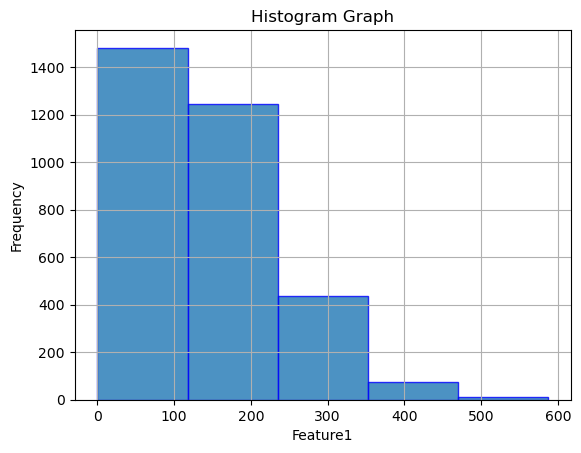

Mean =141.61447999609314
Variance =9826.455131756657


In [55]:
import numpy as np
import matplotlib.pyplot as plt
feature1=df['f5']

# Define the number of bins (buckets) for the histogram
n=5

# Calculate the histogram data (hist_counts) and bin edges (bin_edges)
hist_counts, bin_edges = np.histogram(feature1, bins=n)

# Calculate the mean and variance of 'Feature1'
mean= np.mean(feature1)
variance= np.var(feature1, ddof=1)  # Use ddof=1 for sample variance

# Plot the histogram
plt.hist(feature1, bins=n, edgecolor='blue', alpha=0.8)
plt.xlabel('Feature1')
plt.ylabel('Frequency')
plt.title('Histogram Graph')
plt.grid(True)

# Show the histogram and statistics
plt.show()

# Print the mean and variance of 'Feature1'
print(f'Mean ={mean}')
print(f'Variance ={variance}')


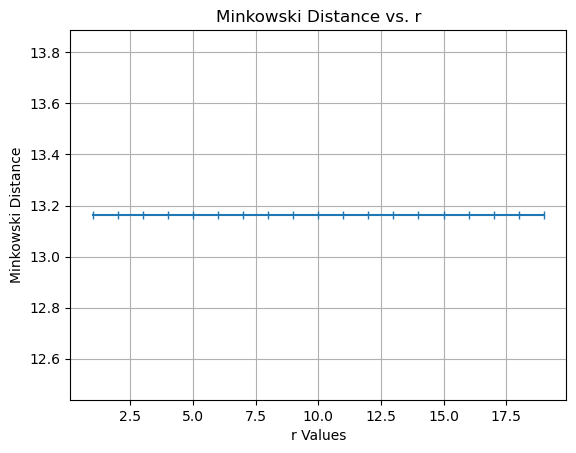

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

vector1 = np.array([df['f0'][0], df['f1'][0]])
vector2 = np.array([df['f0'][3], df['f1'][3]])

# Define a range of values for 'r'
r=range(1, 20)

# Calculate Minkowski distances for different 'r' values
r_distance=[distance.minkowski(vector1, vector2, p=r) for r in r]

# Create a plot to observe the nature of the graph
plt.plot(r, r_distance, marker='|', linestyle='-')
plt.title('Minkowski Distance vs. r')
plt.ylabel('Minkowski Distance')
plt.xlabel('r Values')
plt.grid(True)
plt.show()


In [58]:
import numpy as np
from sklearn.model_selection import train_test_split

select= [0, 1]
selected_data = df[df['Label'].isin(select)]

# Define your features (X) and target (y)
X = selected_data[['f0', 'f1']]
y = selected_data['Label']

# Split the dataset into a train set (70%) and a test set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=50)

# Now, you have your train and test sets for binary classification
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (537, 2)
X_test shape: (2152, 2)
y_train shape: (537,)
y_test shape: (2152,)


In [59]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# Assuming you have already split your data into X_train and y_train
# If not, please refer to the previous code for splitting the data.

# Create a k-NN classifier with k=3
k_neighbour= KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to your training data
k_neighbour.fit(X_train, y_train)
accuracy = k_neighbour.score(X_test, y_test)

# Print the accuracy report
print(f'Accuracy = {accuracy}')

Accuracy = 0.9363382899628253


In [43]:

test_vect = [[0.009625,0.003646 ]]  # Replace with the feature values you want to classify

# Use the predict() function to classify the test vector
predicted_class = k_neighbour.predict(test_vect)

# Print the predicted class
print(f'Predicted Class={predicted_class[0]}')


Predicted Class=1


c:\Users\ril\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


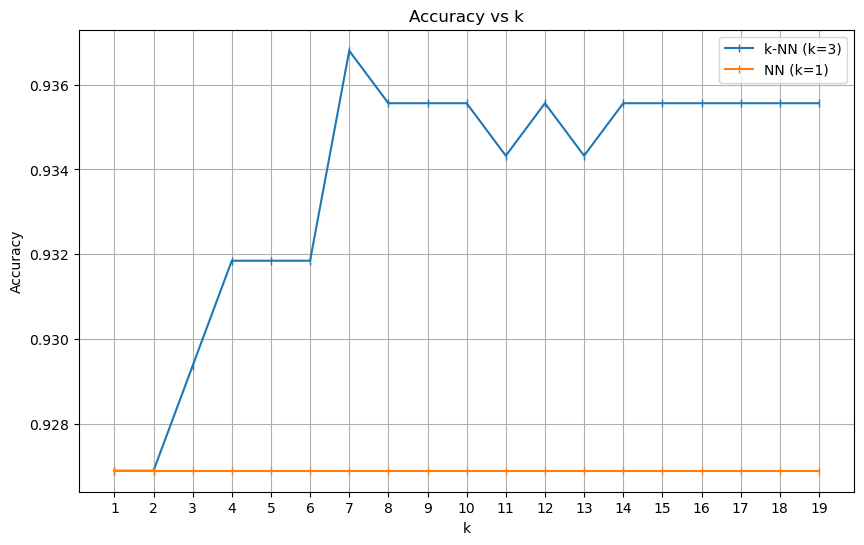

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define your feature vectors (X_train, X_test) and class labels (y_train, y_test)
# Assuming you have already split your data into training and test sets
# If not, please refer to the previous code for splitting the data.

# Create arrays to store accuracy values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

k_values = range(1, 20)
k_accuracies = []
n_accuracies = []

# Iterate through different values of k
for k in k_values:
    # Train k-NN classifier with k=3
    knn_classi = KNeighborsClassifier(n_neighbors=k)
    knn_classi.fit(X_train, y_train)

    # Predict using k-NN
    knn_predictions = knn_classi.predict(X_test)

    # Calculate accuracy for k-N
    # N
    knn_accuracy = accuracy_score(y_test, knn_predictions)
    k_accuracies.append(knn_accuracy)

    # Train NN classifier with k=1
    nn_classifier = KNeighborsClassifier(n_neighbors=1)
    nn_classifier.fit(X_train, y_train)

    # Predict using NN
    nn_predictions = nn_classifier.predict(X_test)

    # Calculate accuracy for NN
    nn_accuracy = accuracy_score(y_test, nn_predictions)
    n_accuracies.append(nn_accuracy)

# Plot the accuracy results
plt.figure(figsize=(10, 6))
plt.plot(k_values, k_accuracies, label='k-NN (k=3)', marker='|')
plt.plot(k_values, n_accuracies, label='NN (k=1)', marker='|')
plt.title('Accuracy vs k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()


In [64]:
from sklearn.metrics import confusion_matrix, classification_report

# Train a k-NN classifier with k=3 on the training data
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

# Predict class labels for the training and test data
y_train_p= neigh.predict(X_train)
y_test_p= neigh.predict(X_test)

# Calculate confusion matrices for training and test data
confusion_matrix_train = confusion_matrix(y_train, y_train_p)
confusion_matrix_test = confusion_matrix(y_test, y_test_p)

# Generate classification reports for training and test data
report_train = classification_report(y_train, y_train_p)
report_test = classification_report(y_test, y_test_p)

# Print confusion matrices and classification reports
print("the confusion matrix and classification report for train is")
print("Confusion Matrix:")
print(confusion_matrix_train)
print("\nClassification Report:")
print(report_train)
print("the confusion matrix and classification report for test is")
print("\nConfusion Matrix:")
print(confusion_matrix_test)
print("\nClassification Report:")
print(report_test)


the confusion matrix and classification report for train is
Confusion Matrix:
[[ 658   61]
 [  23 1140]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       719
           1       0.95      0.98      0.96      1163

    accuracy                           0.96      1882
   macro avg       0.96      0.95      0.95      1882
weighted avg       0.96      0.96      0.96      1882

the confusion matrix and classification report for test is

Confusion Matrix:
[[295  41]
 [ 16 455]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.88      0.91       336
           1       0.92      0.97      0.94       471

    accuracy                           0.93       807
   macro avg       0.93      0.92      0.93       807
weighted avg       0.93      0.93      0.93       807

